In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import pickle



## Name and movies datasets



For this project we decided to work on the CMU movie dataset containing metadata extracted from Freebase, including Movie metadata like Movie box office revenue, genre, release date, runtime, and language but also Character metada like character names and aligned information about the actors who portray them, including gender and estimated age at the time of the movie's release. 
First let's see what the 2 metadasets contains.

#### Characters
The dataset contains informations  450,669 characters aligned to the movies such as Wikipedia movie ID,  Freebase movie ID, Movie release date, Character name, Actor date of birth, Actor gender, Actor height (in meters), Actor ethnicity,Actor name, Actor age at movie release, Freebase character/actor map ID, Freebase character ID, Freebase actor ID. 


#### Movies
The dataset contains informations on 81,741 movies such as the Wikipedia movie ID, Freebase movie ID, Movie name, Movie release date, Movie box office revenue, Movie runtime, Movie languages, Movie countries, Movie genres .



#### Cleaning

The cleaning task was implement in the *clean_raw_data()* method of our different CharacterData and MovieData classes implementation (by Wikipedia Movie ID) and validated using the *check_clean_data()* method, available and shared by the 2 datasets (python inheritance).

From both metadataset, we directly oberved similar features such as Wikipedia Movie ID and Freebase Movie ID that is useful for futur merge of the 2 dataset. However, as in both datasets we saw that there were several columns containing Freebase and Wikipedia IDs for actors, characters and films, we decided to put them aside as the data is too difficult to access.

This are the different steps we applied to both datasets before merging:

Character dataset:
- Load with the right spacer.
- Rename the columns for proper understanding.
- Check the good type format : Actor date of birth and the Release Date as a datetime, and the other into objects.
- Deal with missing values : we wrote them as NaN or NaT
- Droping unwanted columns
- Checking that the cleaning was made

Movie dataset :
- Load with the right spacer.
- Rename the columns for proper understanding.
- Modify the Language, Country and Genre columns:  the information was a JSON format not readable nor accessible so we isolate the information and replace it by a human-readable string format.
- Modify the datatypes of movie runtime into timedelta and the release date into a datetime object for further manipulation.
- Modify the movie Name, Language, Country and Genre:  we checked that they were in object type and modified them if not.
- Deal with missing values : we wrote them as NaN or NaT
- Dropping the unwanted columns
- Check that the cleaning was made


We kept the whole dataset with NaN and NaT values in a specific file to keep features that could be interesting even if the rate of missing values is very high (such as etchnicity or Box office revenue). However, for the following notebook, to make some we decided to remove this 2 columns since they have more than 70% missing values.



### Loading the cleaned datasets

To facilitate the running of the notebook we saved the cleand dataframe into .csv files.


In [6]:
# MOVIES AND CHARACTER DADASET
# load class instance for mov_char_data
mov_char_datapath = "data/clean/movies_char/movies_characters_data.pkl"
with open(mov_char_datapath, 'rb') as f:
    mov_char_data = pickle.load(f)


print("movies_characters_data  loaded successfully")
mov_char_data.head(1) # Access the clean DataFrame


movies_characters_data  loaded successfully


,Wikipedia_movie_ID,Movie_name,Release_date,Revenue,Runtime,Languages,Countries,Genres,Character_name,Actor_DOB,Actor_gender,Actor_height,Actor_name,Actor_age
0,3196793,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,0 days 01:35:00,English,United States of America,"Mystery, Biographical film, Drama, Crime Drama",POLICE OFFICER,NaT,M,NaN,ALLEN CUTLER,NaN


# Names datasets

In order to answer our research questions, we needed to find some birth registries from different countries. Those were freely available and we found datasets for the following countries:

- France
- USA
- United Kingdom
- Norway

Since they all came from different places and didn't follow the same structure, we had to decide what kind of data was necessary for our project and what structure would be the most practical to work with. We ended-up with the following collumns in our dataframes:

1. **Year** : An integer value giving the year of the count 
2. **Name** :  A string representing the name that was counted
3. **Sex** : There are two possible characters, 'F' (female) and 'M' (male)
4. **Count** : An integer value giving the count of the name during this year

## Data homogenization

The cleaning task was implement in the *clean_raw_data()* method of our different NamesData classes implementation (by country) and validated using the *check_clean_data()* method, available and shared by all the name datasets (python inheritance).

### Column structure
This task was not too difficult since it was mostly reordering, renaming the ones needed and dropping the ones that were not useful for our project. We also made sure that the same type was used on the collumns of the different datasets. 

### Year 
All of our dataset had the same year format, but some had missing values in this field, which made those row useless and they were therefore discarded.
This collumn made it hard to find datasets from more countries, since a lot of them started to count only in the early 2000's, which doesn't give us enough data to detect real changes in the distribution. (The movie data base ends in 2012)

### Name
This was the hardest column to sanitize and clean since a lot of variation of a same name are possible. We ended by defining a regex expression do define what we would accept as a valid name : ^[A-Z-\s\']+$

This allows us to limit ourselves to names composed only of capitalized letters, spaces, '-' for composed names and ''' for the some regional variations. This rule is really strict and would have made us lose a considerable proportion of our dataset. This is where the data cleaning process came to help homogenize our data and it mainly consisted of the following operations:

- Converting all the name to uppercase
- Removing all accents on letter, for example é becomes e.

Some names have different spellings, for example you can write JEREMY and JEREMIE, but we decided to count this as two separate entries since grouping "similar" is out of the scope of this project and is not an uniformised concept.

### Sex
The french dataset had some integer values that we converted to the expected format. This field is useful for our research questions, but complicated the dataset research, since a lot of countries did not include this information in their registries.

### Validation

The python class representing our datasets contains a method *check_clean_data()* that checks multiple conditions to be sure that the data is uniform. 

- Checks the collumns' name
- Checks if some missing values are present
- Checks the data type of each collumn
- Checks for duplicated rows (same name, same sex and same name)
- Checks that the strings respects the defined regex expressions
- Checks that the counts and years are coherent numbers 

## Demo

Here, we will import and clean the data base to demonstrate the process.


In [7]:
# NAMES 
global_names_path = "data/clean/names/global_names.pkl"
with open(global_names_path, "rb") as f:
    global_names = pickle.load(f)

print("NamesData  loaded successfully")
global_names.clean_df.head() # Access the clean DataFrame



NamesData  loaded successfully


,Year,Name,Sex,Count
0,1880,AARON,M,102
1,1880,AB,M,5
2,1880,ABBIE,F,71
3,1880,ABBOTT,M,5
4,1880,ABBY,F,6


## Feature of movies and characters dataset visualization

Lets visualize the different information from the datasets.

In [8]:
from src.utils.data_utils import *

In [9]:
# Number of Nan values in the Movies & Character dataset
mov_char_data.isna().sum()

Wikipedia_movie_ID         0
Movie_name                 0
Release_date           40177
Revenue               113277
Runtime                15220
Languages                  0
Countries                  0
Genres                  5666
Character_name             0
Actor_DOB              42769
Actor_gender            6131
Actor_height           93950
Actor_name                 0
Actor_age              51370
dtype: int64

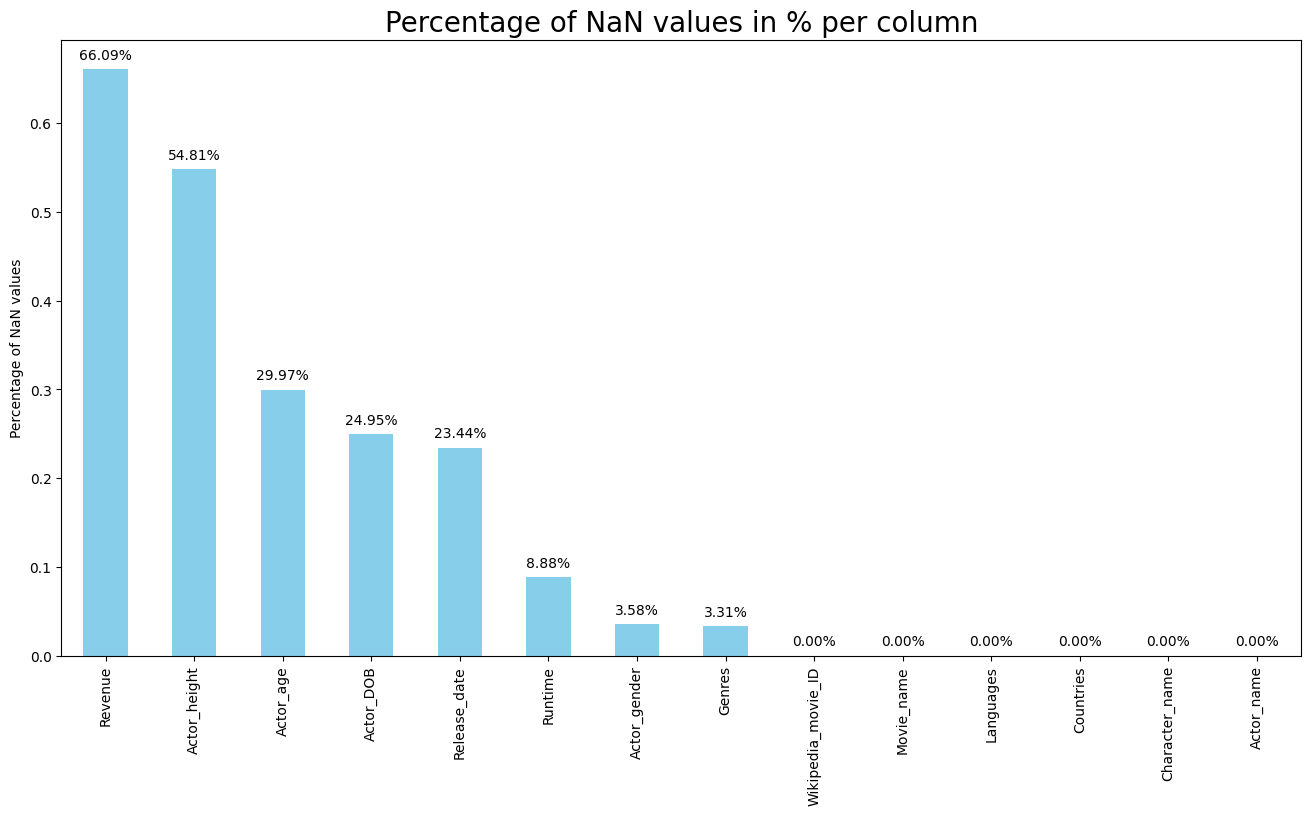

In [10]:
# Visualizing the number of missing values per columns
nan_percentage = mov_char_data.isnull().mean().sort_values(ascending=False)

# Plot the percentage of NaN values per column
ax = nan_percentage.plot(kind='bar', figsize=(16, 8), color='skyblue')
plt.ylabel('Percentage of NaN values')
plt.title('Percentage of NaN values in % per column', fontsize=20)
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2%}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

This graph illustrates the distribution of columns based on the percentage of NaN values present in each. It helps us understand how missing data is spread across different features, highlighting columns with higher or lower levels of incompleteness.
With the revenue features we could have deducted if a movie was a blockbuster, but unfortunately there is too many missing values so we will do an other method.

In [11]:
# Descriptive statistics for each column in dataframe with .head() method
mov_char_data.describe(include='all').head()

,Wikipedia_movie_ID,Movie_name,Release_date,Revenue,Runtime,Languages,Countries,Genres,Character_name,Actor_DOB,Actor_gender,Actor_height,Actor_name,Actor_age
count,1.714000e+05,171400,131223,5.812300e+04,156180,171400,171400,165734,171400,128631,165269,77450.000000,171400,120030.00000
unique,NaN,29805,NaN,NaN,NaN,1140,1240,13912,108621,NaN,2,NaN,66936,NaN
top,NaN,Hemingway & Gellhorn,NaN,NaN,NaN,English,United States of America,Drama,DOCTOR,NaN,M,NaN,MEL BLANC,NaN
freq,NaN,101,NaN,NaN,NaN,95902,80157,10412,186,NaN,104790,NaN,505,NaN
mean,1.329812e+07,NaN,1991-12-11 02:33:08.925721984,9.449211e+07,0 days 01:51:56.190055064,NaN,NaN,NaN,NaN,1951-03-04 10:35:32.443967616,NaN,1.780589,NaN,36.96565


####  Visualizing the top 50 movies with biggest Revenue


C:\Users\Pauline\AppData\Local\Temp\ipykernel_17592\2723364396.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_50_movies.values, y=top_50_movies.index, palette='viridis')


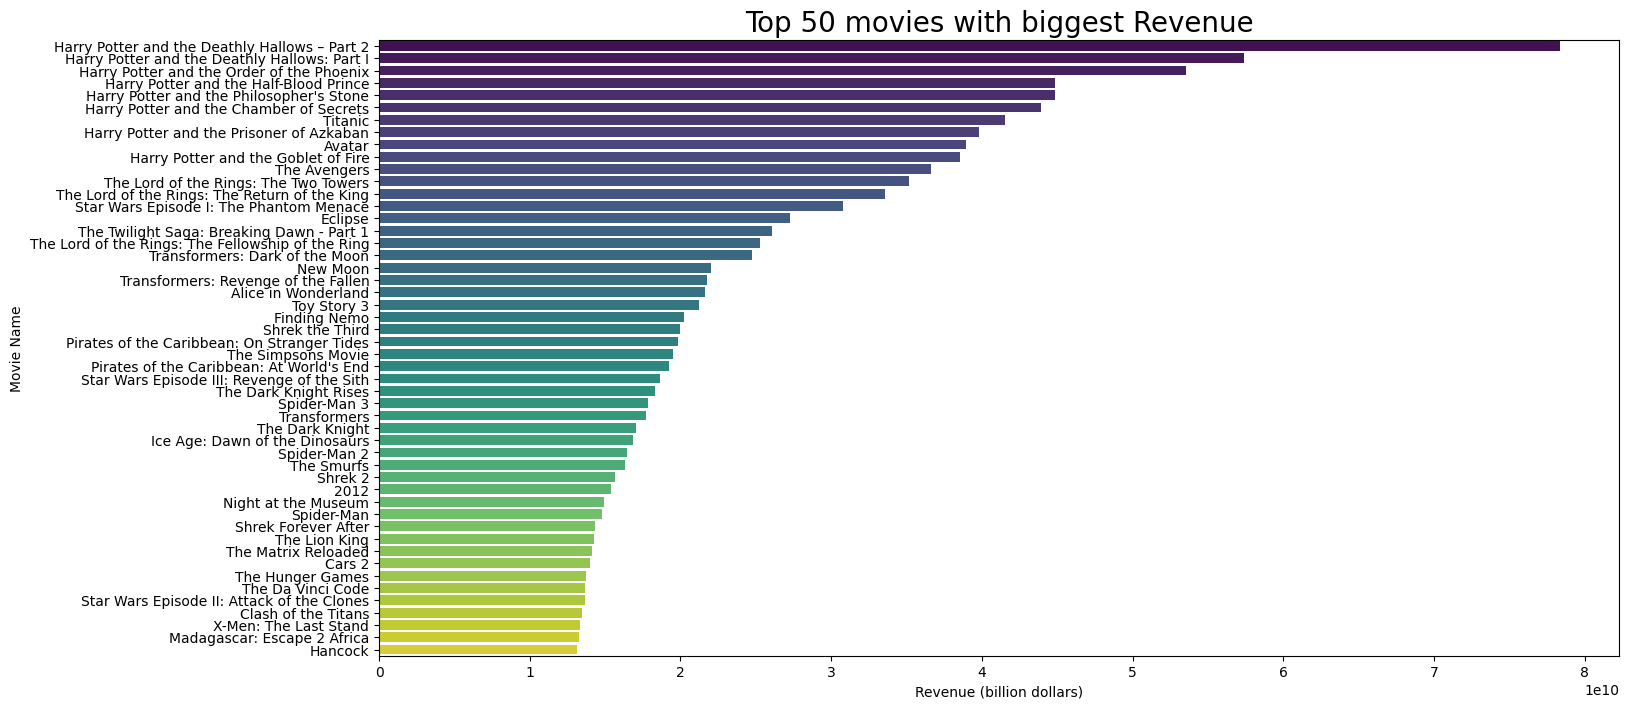

In [12]:
# Group by the Movie name 
top_50_movies = mov_char_data.groupby('Movie_name')['Revenue'].sum().sort_values(ascending=False).head(50)
plt.figure(figsize=(16, 8))
sns.barplot(x=top_50_movies.values, y=top_50_movies.index, palette='viridis')
plt.xlabel('Revenue (billion dollars)')
plt.ylabel('Movie Name')
plt.title('Top 50 movies with biggest Revenue', fontsize=20)
plt.show()



#### Information about Release_date

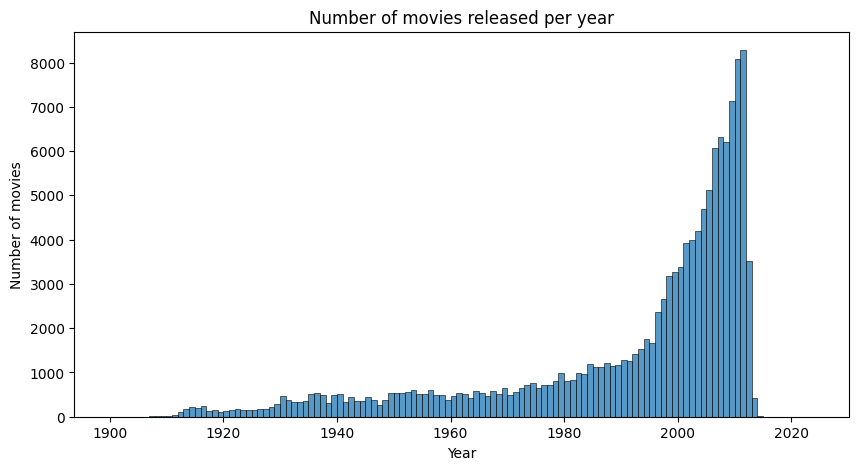

In [13]:
# Visualizing the Release_date column information with sns with the number of movies on the top of each bar
# converting the colum to datetime
mov_char_data['Release_date'] = pd.to_datetime(mov_char_data['Release_date'])   
plt.figure(figsize=(10, 5))
sns.histplot(mov_char_data['Release_date'].dt.year.dropna(), bins=range(1900, 2025, 1), kde=False)
plt.title('Number of movies released per year')
plt.xlabel('Year')
plt.ylabel('Number of movies')
plt.show()


#### Information about countries

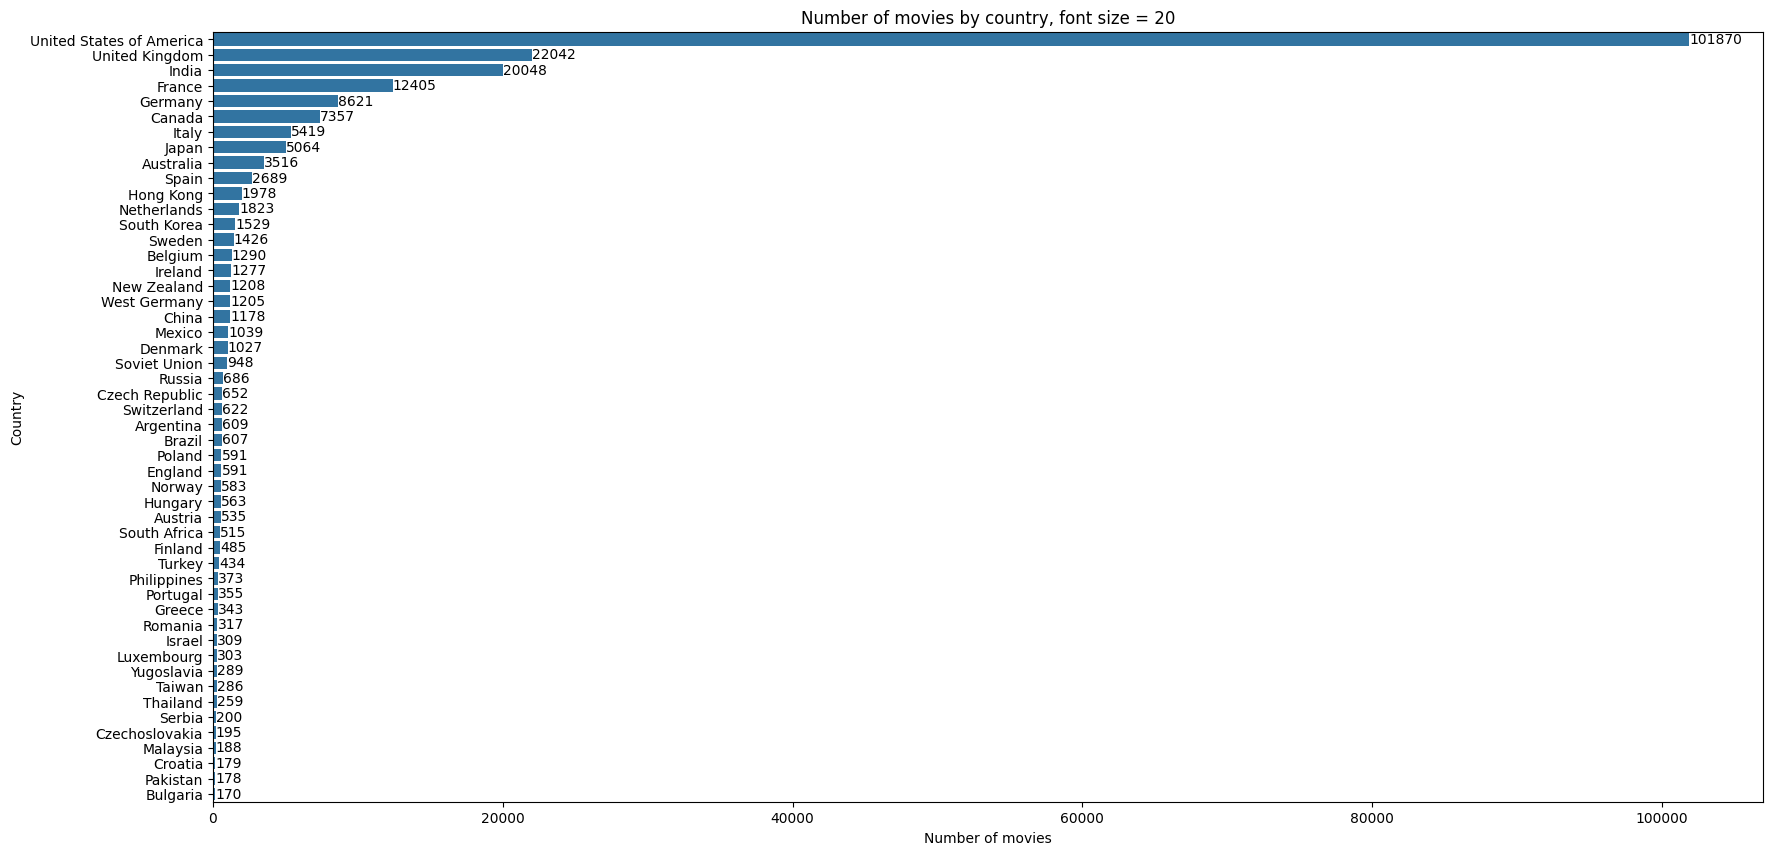

In [14]:
# grouping the movies by country
movies_by_country = mov_char_data['Countries'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True).rename('Country')
movies_by_country = movies_by_country[movies_by_country != ''].value_counts()

plt.figure(figsize=(20, 10))
sns.barplot(x=movies_by_country.head(50), y=movies_by_country.head(50).index)

for i, val in enumerate(movies_by_country.head(50)):
    plt.text(val, i, val, ha='left', va='center')

plt.title('Number of movies by country, font size = 20')
plt.xlabel('Number of movies')
plt.ylabel('Country')
plt.show()


#### Information about language

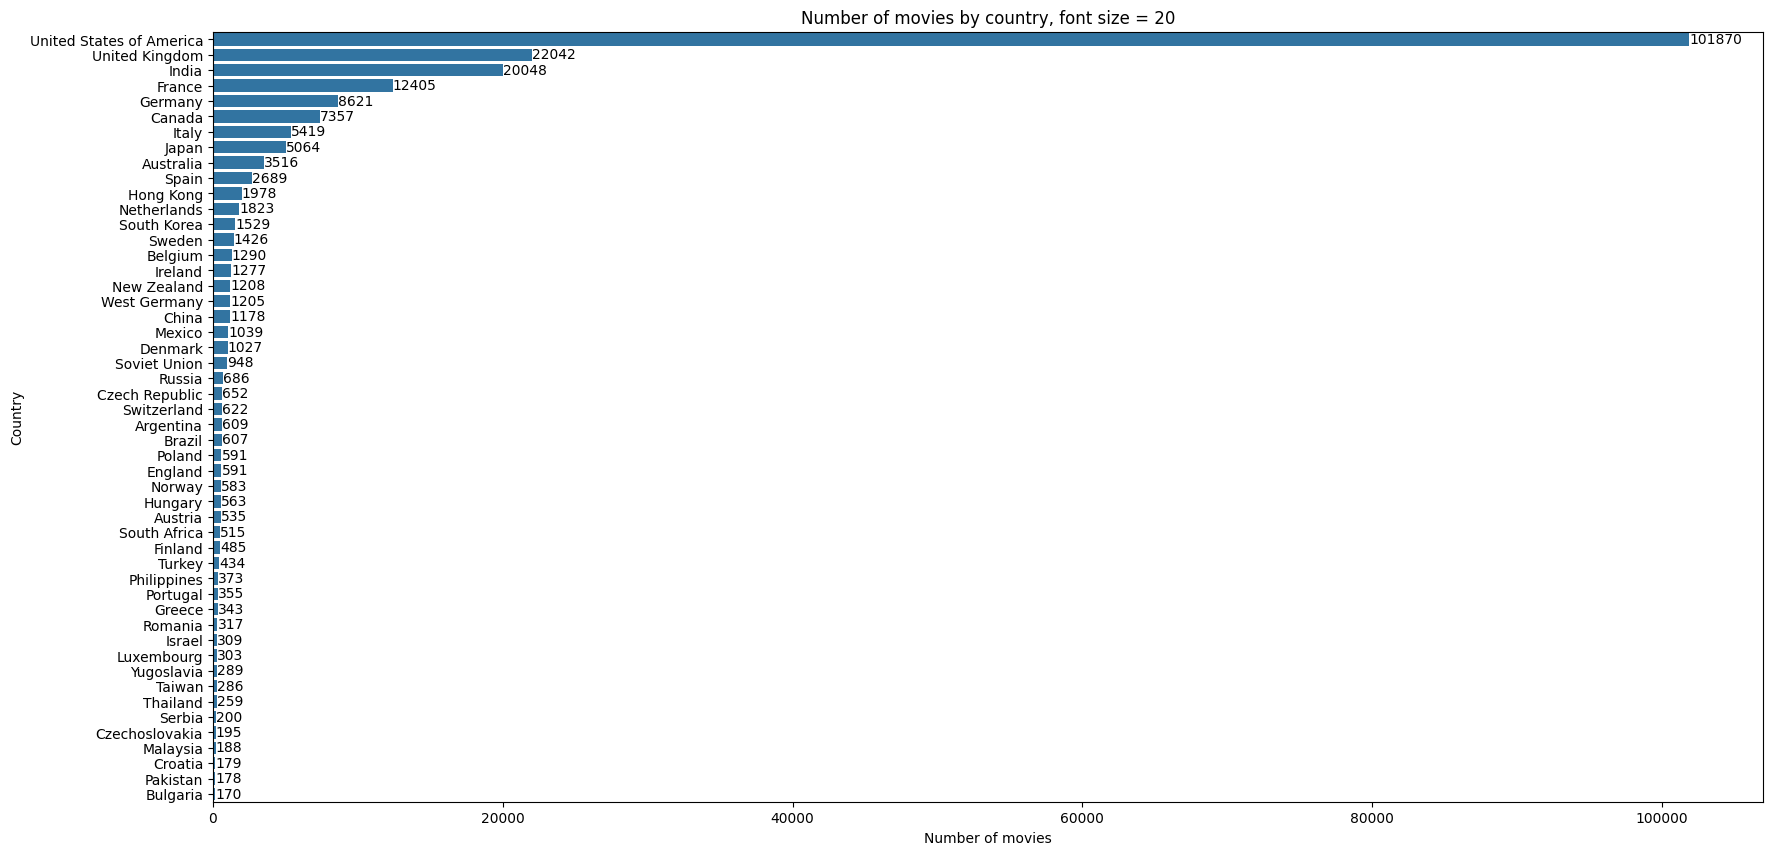

In [15]:
# grouping the movies by country
movies_by_country = mov_char_data['Countries'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True).rename('Country')
movies_by_country = movies_by_country[movies_by_country != ''].value_counts()

plt.figure(figsize=(20, 10))
sns.barplot(x=movies_by_country.head(50), y=movies_by_country.head(50).index)

for i, val in enumerate(movies_by_country.head(50)):
    plt.text(val, i, val, ha='left', va='center')

plt.title('Number of movies by country, font size = 20')
plt.xlabel('Number of movies')
plt.ylabel('Country')
plt.show()


It is obvious that the initial dataset is centered on occidental world, aside from the presence of indian movies. Fortunately it coincides with the fact that it is harder for us to find baby names data from non-occidental countries.

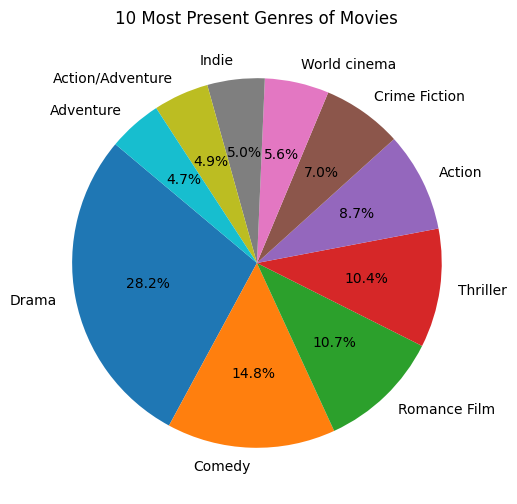

In [16]:
# Grouping movies by genre and counting the occurrences
movies_by_genre = mov_char_data['Genres'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True).rename('Genre')
movies_by_genre = movies_by_genre[movies_by_genre != ''].value_counts()

# Group all genres beyond the top 10 into "Other"
top_10_genres = movies_by_genre[:10]


# Visualizing the top 10 genres with a pie chart
plt.figure(figsize=(6, 6))
plt.pie(top_10_genres, labels=top_10_genres.index, autopct='%1.1f%%', startangle=140)
plt.title('10 Most Present Genres of Movies')
plt.show()



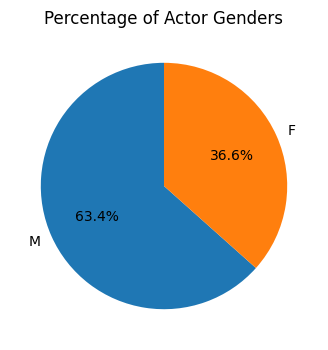

In [17]:
# Isolting the genders columns
new_df = mov_char_data[['Actor_gender', 'Actor_name']]
new_df.head()


gender_counts = new_df['Actor_gender'].value_counts()

# Calculate percentages
gender_percentages = gender_counts / gender_counts.sum() * 100

# Plotting the percentages using a pie chart
plt.figure(figsize=(4, 4))
plt.pie(gender_percentages, labels=gender_percentages.index, autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Actor Genders')
plt.show()


### Correlation matrix 

In [18]:
def encode_categorical_features(df):
    # Identify categorical features
    categorical_features = df.select_dtypes(include=['object', 'category']).columns
    
    # Initialize a LabelEncoder
    le = LabelEncoder()
    
    # Apply label encoding to each categorical feature
    for feature in categorical_features:
        df[feature] = le.fit_transform(df[feature].astype(str))
    
    return df

def plot_correlation_matrix(df):
    # Encode categorical features
    df_encoded = encode_categorical_features(df.copy())
    
    # Calculate the correlation matrix, automatically excluding NaN values
    corr_matrix = df_encoded.corr()
    
    # Plot the heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True, square=True)
    plt.title('Correlation Matrix')
    plt.show()

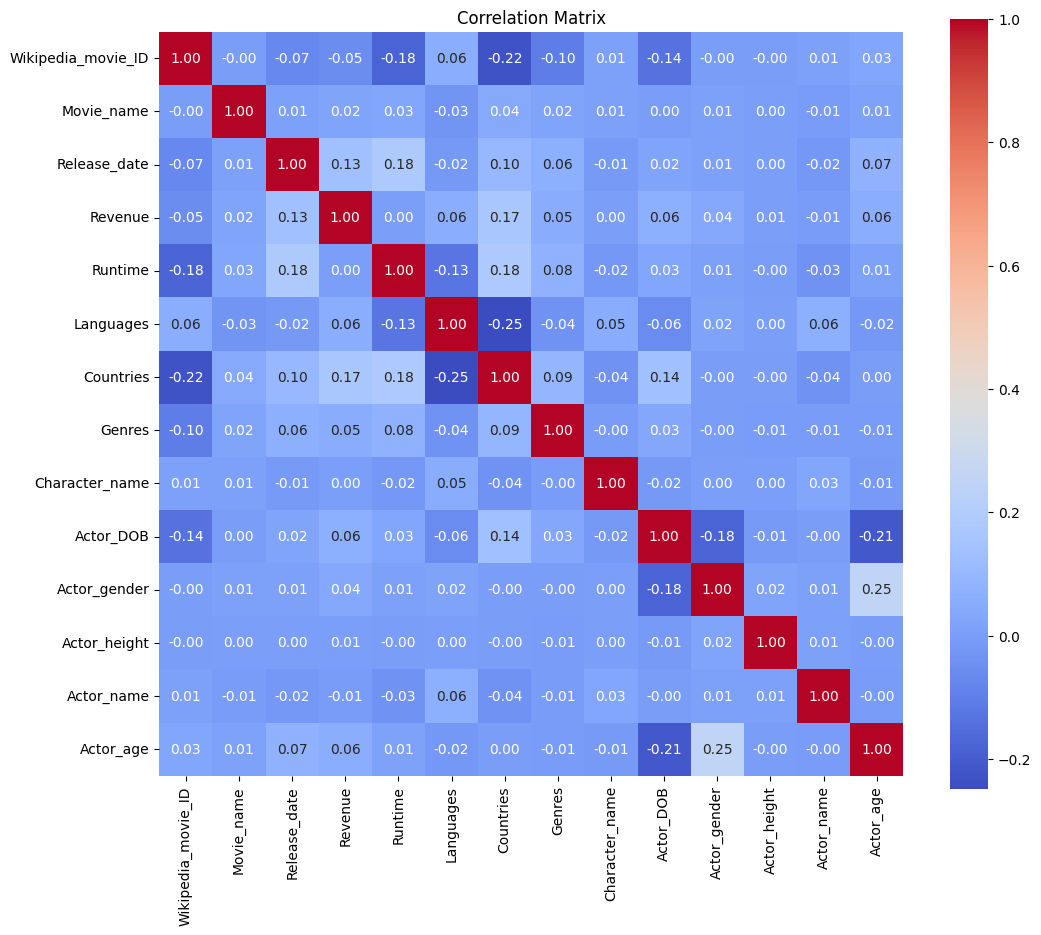

In [19]:
plot_correlation_matrix(mov_char_data)

#### Conclusion of this feature visualisation:

This visualisation on the dataset gives us a first insight of the content of the dataset and to see that there is a occidental domination on the dataset considering the language, countries for example.

## Trend evaluation
To assess what impact a movie had on child naming, we first try a simple model that computes the average count of babies named like a character 5 years before and 5 years after the movie's release, and compute their difference. The higher it is, the higher the trend the year the film was released.

Here is a demo of the model printing the top10 trend-inducing character names

In [20]:
# IMDB VOTES AND RATINGS
imdb_clean_datapath = "data/clean/imdb/imdb_of_interest.pkl"
with open(imdb_clean_datapath, 'rb') as f:
    imdb_data = pickle.load(f)

print("IMDB oof interest  loaded successfully")
imdb_data.head() # Access the clean DataFrame


IMDB oof interest  loaded successfully


,primaryTitle,weightedAverageRating,totalVotes,isBlockbuster
0,!Women Art Revolution,6.9,262.0,False
1,#1 Serial Killer,5.6,73.0,False
2,#1915House,3.4,20.0,False
3,#5,4.7,21.0,False
4,#50Fathers,3.7,12.0,False


In [21]:
# Ranking the top 50 movies by IMDB rating and total votes
top_50_movies = imdb_data.sort_values('totalVotes', ascending=False)
top_50_movies.head(20)

,primaryTitle,weightedAverageRating,totalVotes,isBlockbuster
247302,The Shawshank Redemption,9.30,2971050.0,True
226953,The Dark Knight,9.00,2952379.0,True
108105,Inception,8.80,2619982.0,True
79354,Fight Club,8.80,2403489.0,True
82601,Forrest Gump,8.80,2324952.0,True
182204,Pulp Fiction,8.90,2280958.0,True
109329,Interstellar,8.70,2211329.0,True
239992,The Matrix,8.70,2108846.0,True
232097,The Godfather,9.20,2072334.0,True
238458,The Lord of the Rings: The Fellowship of the Ring,8.90,2063322.0,True


In [22]:
# EXPANDED DATA: MOVIES, CHARACTERS, IMDB VOTES AND RATINGS
expanded_datapath = "data/clean/expanded/expanded_df.pkl"
with open(expanded_datapath, 'rb') as f:
    expanded_imdb_mov_char_data = pickle.load(f)

print("Expanded dataset instance loaded successfully")
expanded_imdb_mov_char_data.head(1) # Access the clean DataFrame

Expanded dataset instance loaded successfully


,Wikipedia_movie_ID,Movie_name,Release_date,Revenue,Runtime,Languages,Countries,Genres,Character_name,Actor_DOB,Actor_gender,Actor_height,Actor_name,Actor_age,primaryTitle,weightedAverageRating,totalVotes,isBlockbuster
0,3196793,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,0 days 01:35:00,English,United States of America,"Mystery, Biographical film, Drama, Crime Drama",POLICE OFFICER,NaT,M,NaN,ALLEN CUTLER,NaN,NaN,NaN,NaN,NaN


In [23]:
# Ranking top 10 influencing character names by trend increase
from src.models.trend_evaluation import trend_eval_ranking

# Ensure release_year is in datetime format
expanded_imdb_mov_char_data['Release_date'] = pd.to_datetime(expanded_imdb_mov_char_data['Release_date'], errors='coerce')

ranking = trend_eval_ranking(global_names.clean_df, expanded_imdb_mov_char_data)
ranking[["Character_name","movie_name","release_year"]].head(10)

,Character_name,movie_name,release_year
999,MARK,Dial M for Murder,1954.0
1051,MICHAEL,Peter Pan,1953.0
375,DAVID,Sabrina,1954.0
495,EMMA,The Avengers,1998.0
654,HANNAH,Toy Story,1995.0
1439,SUSAN,Citizen Kane,1941.0
912,LISA,Rear Window,1954.0
380,DEBBIE,The Searchers,1956.0
794,JONATHAN,Superman,1978.0
1023,MATTHEW,Taxi Driver,1976.0


In [24]:
import plotly.express as px

# Split genres and normalize
df = mov_char_data.copy().drop_duplicates(subset=["Movie_name"])
df_genres = df.assign(Genres=df["Genres"].str.split(", ")).explode("Genres")

# Count occurrences of each genre
genre_counts = df_genres["Genres"].value_counts().reset_index()
genre_counts.columns = ["Genre", "Count"]

# Select the top 10 genres
top_10_genres = genre_counts.head(10)

# Create horizontal bar graph
fig = px.bar(
    top_10_genres,
    x="Count",
    y="Genre",
    orientation="h",  # Horizontal orientation
    title="Top 10 Most Represented Genres in Movies Dataset",
    labels={"Count": "Number of Movies", "Genre": "Genre"},
    text="Count",
    color="Genre"
)

# Style the graph for better readability
fig.update_traces(textposition="outside")
fig.update_layout(
    xaxis=dict(title="Number of Movies"),
    yaxis=dict(title="Genre"),
    plot_bgcolor="white",
    showlegend=False
)

fig.show()
fig.write_html("top_10_genres.html")

# Print sum of counts
print(f"Sum of counts: {genre_counts['Count'].sum()}")


Sum of counts: 108684


In [25]:
# In blockbuster movies, what are the top 10 most represented names of character?

# Isolating the blockbuster movies
blockbuster_movies = expanded_imdb_mov_char_data[expanded_imdb_mov_char_data['isBlockbuster'] == 1]

# What are the top 10 most represented names of character in blockbuster movies?
blockbuster_character_names = blockbuster_movies['Character_name'].value_counts()
blockbuster_character_names.head(10)



Character_name
YOUNG BULLY            4
BOROMIR                3
GALADRIEL              3
GOLLUM                 3
GIMLI                  3
ELROND                 3
FARAMIR                3
ARAGORN                3
MERIADOC BRANDYBUCK    3
GANDALF                3
Name: count, dtype: int64

In [26]:
expanded_imdb_mov_char_data.head(1)

,Wikipedia_movie_ID,Movie_name,Release_date,Revenue,Runtime,Languages,Countries,Genres,Character_name,Actor_DOB,Actor_gender,Actor_height,Actor_name,Actor_age,primaryTitle,weightedAverageRating,totalVotes,isBlockbuster,Release_year
0,3196793,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,0 days 01:35:00,English,United States of America,"Mystery, Biographical film, Drama, Crime Drama",POLICE OFFICER,NaT,M,NaN,ALLEN CUTLER,NaN,NaN,NaN,NaN,NaN,2000.0


### By genres, the most reccurent character names

In [27]:
from src.models.trend_by_genres import *

In [28]:
valid_names_df = clean_valid_names(global_names)


Initial name dataset size: (2262552, 4)
Cleaned name dataset size: (149381, 4)


In [29]:
top_10_genres = get_top_10_genres(expanded_imdb_mov_char_data)


Top 10 genres: ['Drama', 'Comedy', 'Romance Film', 'Thriller', 'Action', 'Crime Fiction', 'World cinema', 'Indie', 'Action/Adventure', 'Romantic drama']


In [30]:
filtered_data = filter_data_by_top_genres(expanded_imdb_mov_char_data, top_10_genres)


In [31]:
top_names_df = merge_and_analyze_names(filtered_data, valid_names_df)
print(top_names_df.head(10))


   Genres Character_name  Count
0  Action          FRANK     36
1  Action            SAM     32
2  Action           TONY     29
3  Action          JIMMY     25
4  Action        CHARLIE     24
5  Action          MARIA     24
6  Action          VIJAY     24
7  Action          BILLY     22
8  Action           JACK     22
9  Action        SHERIFF     22


In [32]:
visualize_top_names(top_names_df)


In [33]:
# Export the figure as an HTML file
fig.write_html("docs/_includes/top_10_names_by_genres.html")


### not cleaned

In [ ]:
import pandas as pd

# Access the actual DataFrame within the `NamesData` object
valid_names_df = global_names.clean_df  # Access the DataFrame
print("valid_name_df size:", valid_names_df.shape)


# Remove rows where Name is 'M' or 'DOCTOR'
valid_names_df = valid_names_df[~valid_names_df["Name"].isin(["M", "DOCTOR"])]

# Verify the changes
print("Remaining rows:", valid_names_df.shape)
print(valid_names_df.head())


In [ ]:
valid_names_df[valid_names_df["Name"]=="M"]

In [ ]:
# Remove duplicates to avoid bias in movie character dataset
df = expanded_imdb_mov_char_data.drop_duplicates(subset=["Movie_name", "Character_name"])

# Split genres into lists and explode them
df_genres = df.assign(Genres=df["Genres"].str.split(", ")).explode("Genres")
df_genres.head(5)


In [ ]:
# Step 1: Group by Movie_name to determine the top 10 movie genres
# Remove duplicates for movies to avoid actor-based duplicates
unique_movies = expanded_imdb_mov_char_data.drop_duplicates(subset=["Movie_name"])

# Split genres into lists and explode them for proper analysis
unique_movies_genres = unique_movies.assign(Genres=unique_movies["Genres"].str.split(", ")).explode("Genres")

# Count the number of unique movies per genre and determine the top 10 genres
top_10_genres = (
    unique_movies_genres["Genres"]
    .value_counts()
    .head(10)
    .index.tolist()
)

# Create a dataframe containing only the top 10 genres
top_10_genres_df = unique_movies_genres[unique_movies_genres["Genres"].isin(top_10_genres)]

print("Top 10 genres:", top_10_genres)


In [ ]:
# Step 2: Isolate rows from expanded_imdb_mov_char_data that belong to these top 10 genres
# Explode the Genres column in the main dataset for analysis
expanded_data_genres = expanded_imdb_mov_char_data.assign(Genres=expanded_imdb_mov_char_data["Genres"].str.split(", ")).explode("Genres")

# Filter to include only rows where the genre is in the top 10 genres
filtered_data = expanded_data_genres[expanded_data_genres["Genres"].isin(top_10_genres)]

filtered_data.head(5)

In [ ]:
# Step 3: Validate character names against the global_names dataset
# Access the clean global_names dataframe
#create a dataframe with only the names from global names, with the title of the column as "Name"

valid_names_df.drop_duplicates(subset=["Name"], inplace=True)
valid_names_df.head(10)

# is there M ?
valid_names_df[valid_names_df["Name"]=="M"]

In [ ]:
valid_names_df[valid_names_df["Name"] == "DOCTOR"].head(10)


In [ ]:
# from filtered_data, isolate the columns: Movie_Name, Genres, Character_name
genres_reduced_df = filtered_data[["Movie_name", "Genres", "Character_name"]]
genres_reduced_df.head(50)


In [ ]:
genres_reduced_df[genres_reduced_df["Character_name"]=="MORGANA"].head(10)

In [121]:
# Extract first names from Character_name and filter them
# keep only columns : Movie_name, Genres, Character_first_name
# Fusionner les deux datasets (inner join)
filtered_movies_df = genres_reduced_df.merge(
    valid_names_df,
    left_on='Character_name',
    right_on='Name',
    how='inner'
)



In [ ]:
# print size
print("Size of filtered dataset:", filtered_movies_df.shape)
filtered_movies_df.head(10)

In [ ]:
# Step 5: Determine the top 10 names for each genre
filtered_movies_df = (
    filtered_movies_df.groupby("Genres")["Character_name"]
    .value_counts()
    .groupby(level=0)
    .nlargest(10)
    .reset_index(level=0, drop=True)
    .reset_index(name="Count")
)

filtered_movies_df.head(50)

In [ ]:
import plotly.express as px

# Créer un treemap avec les données
fig = px.treemap(
    filtered_movies_df,
    path=['Genres', 'Character_name'],  # Hiérarchie : Genre > Prénom
    values='Count',                    # Taille proportionnelle au nombre d'occurrences
    title="Répartition des Top 10 Prénoms par Genre de Films",
    color='Genres',                    # Couleur basée sur le Genre
    template="plotly_dark"             # Thème visuel
)

fig.show()


## Sex influence

In [ ]:
yup


### Trend visualisation
Using the previously computed trend-inducing movies, we can now plot the baby name popularity over time with a red line on the year of the most influential movie for this name.

Note that we need to indicate the name in uppercase for compatibility with name datasets and add the gender M/F to avoid confusion for androgenous names.

In [ ]:
from src.models.trend_evaluation import plot_trend

plot_trend("NEO", "M", ranking, global_names)

## Name prediction

To answer our research questions, we needed to find a method to determine if after a specific date, the count of name would follow an abnormal evolution.

There are multiple ways to do it and for our first tentative, we decided to try interrupted time series.

### ITS - Interrupted time series
The concept is rather simple: at a specific point in time, we split our measurements in two parts and use the first one to train a model. This model will try to predict what the evolution would have been based on the previous behaviour and once we get it, we can compare it with the second part of the data that we kept. 

As mentioned in the explanation, we need to chose a model for this and after some researches, we decided to try the two following ones.

We are still evaluating how well they are suited for our project, since the training sample is quite limited due to the granularity of the data. (Count is by year)

#### SARIMA - Seasonal Autoregressive Integrated Moving Average
Well known model for univariate time series forecasting, SARIMA is an extension of the ARIMA model and adds the support for time series with a seasonal behaviour in addition to the trend support of ARIMA. 

In [ ]:
from src.models.naming_prediction import predict_naming_ARIMA

prediction = predict_naming_ARIMA(global_names, "LUKE", 1976, 10, True)

Here we asked our SARIMA model to forecast the counts for the name "Luke" from the year after the year 1976, which is when the first Star Wars movie was released. 

We can see that the the modelled curve has a slower growth than the actual one and this can be used to show an abnormal evolution of the count.

#### Prophet
Developped by Facebook, Prophet is a fully automatic procedure made for time series forecasting that is used in various context due it's wide range of features (seasonality, holidy effect, ...)   

In [ ]:
from src.models.naming_prediction import predict_naming_prophet

prediction = predict_naming_prophet(global_names, "LUKE", 1976, 10, True)